<a href="https://colab.research.google.com/github/XTMay/AI_OCR/blob/main/layoutlmv3_ner/Lec_5_7/Lec_6_layoutlmv3_Label.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


## 安装依赖

In [2]:
!pip install -U transformers

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 41.7/41.7 kB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.2/11.2 MB 102.6 MB/s eta 0:00:00
  Attempting uninstall: transformers
    Found existing installation: transformers 4.54.0
    Uninstalling transformers-4.54.0:
      Successfully uninstalled transformers-4.54.0


### Local Inference on GPU
Model page: https://huggingface.co/microsoft/layoutlmv3-base

⚠️ If the generated code snippets do not work, please open an issue on either the [model repo](https://huggingface.co/microsoft/layoutlmv3-base)
			and/or on [huggingface.js](https://github.com/huggingface/huggingface.js/blob/main/packages/tasks/src/model-libraries-snippets.ts) 🙏

In [3]:
# Load model directly
from transformers import AutoModel
model = AutoModel.from_pretrained("microsoft/layoutlmv3-base")

/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/856 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

In [4]:
!pip install -q transformers pytesseract layoutparser pillow opencv-python matplotlib datasets seqeval
!apt-get -qq install tesseract-ocr

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 2.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.2/42.2 kB 3.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 42.8/42.8 kB 3.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.5/48.5 kB 3.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.2/19.2 MB 73.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.0/60.0 kB 4.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 84.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.8/2.8 MB 66.6 MB/s eta 0:00:00


## OCR 识别文本 + 坐标

In [4]:
from PIL import Image
import pytesseract

image_path = '/content/drive/MyDrive/AI_Lecture/dataset/images/invoice1.jpg'
image = Image.open(image_path).convert("RGB")
ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)

words = []
boxes = []
width, height = image.size

for i in range(len(ocr_data["text"])):
    if ocr_data["text"][i].strip() != "":
        words.append(ocr_data["text"][i])
        x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
        # normalize to 0-1000 as required by LayoutLM
        boxes.append([
            int(1000 * x / width),
            int(1000 * y / height),
            int(1000 * (x + w) / width),
            int(1000 * (y + h) / height)
        ])

In [5]:
words

['WA',
 'PRA]',
 'Test',
 'Co.,Ltd.',
 'Invoice',
 'Vendor',
 'code:',
 'XX840-SXX',
 'Bill',
 'To:',
 'test1',
 'Corporation',
 'Sold',
 'To:test1',
 'Corporation',
 'Ship',
 'To:',
 'test1',
 'VIETNAM',
 'CO.,LTD.',
 'HAfa]:',
 '2025',
 'F',
 '6',
 '4',
 '30',
 'Invoice',
 'NO:',
 'Y',
 '309824263008',
 'ITEM',
 '|',
 'P.O.NO',
 '|',
 'DESCRIPTION',
 '|',
 'QTY',
 '|',
 'UNITPRICE',
 '|',
 'AMOUNT',
 '|',
 'DELIVERY',
 'USD',
 'Pcs',
 '|',
 'USD',
 'NOTE',
 'NO',
 '1',
 'aK',
 '21423-',
 '100',
 '|',
 '3.00000',
 '300.00',
 '|',
 '3138872',
 '065150B111',
 'Total',
 '100',
 '300',
 'PAYMENTTERM:',
 '150DAYS',
 'BANK',
 'INFORMATION:',
 'Name',
 'of',
 'beneficiary:',
 'test2',
 'ELECTRONIC',
 'CO.,LTD',
 'Name',
 'of',
 'beneficiary',
 'bank:',
 'BANK',
 'OF',
 'test',
 'BRANCH',
 'Address',
 'of',
 'beneficiary',
 'bank:',
 'test',
 'road',
 'Bank',
 'account',
 'number:',
 '000099998888',
 'Contact',
 'person:',
 'MISS',
 'test']

In [6]:
boxes

[[353, 91, 452, 104],
 [454, 91, 512, 104],
 [392, 127, 427, 136],
 [432, 127, 499, 138],
 [394, 161, 454, 170],
 [151, 195, 212, 205],
 [218, 195, 264, 205],
 [270, 195, 365, 205],
 [146, 228, 178, 244],
 [182, 230, 205, 239],
 [211, 230, 251, 239],
 [260, 230, 362, 242],
 [151, 298, 189, 308],
 [194, 298, 259, 308],
 [268, 298, 370, 310],
 [474, 230, 511, 242],
 [516, 230, 539, 239],
 [545, 230, 585, 239],
 [593, 230, 671, 239],
 [678, 230, 752, 241],
 [598, 159, 639, 172],
 [645, 161, 686, 170],
 [693, 164, 712, 168],
 [718, 161, 727, 170],
 [744, 171, 748, 172],
 [759, 161, 779, 170],
 [596, 333, 655, 342],
 [662, 333, 694, 342],
 [700, 333, 710, 342],
 [714, 333, 842, 342],
 [162, 365, 201, 375],
 [207, 360, 227, 380],
 [233, 365, 293, 375],
 [292, 360, 311, 380],
 [316, 365, 436, 375],
 [437, 360, 457, 380],
 [458, 367, 492, 379],
 [505, 360, 524, 380],
 [530, 367, 629, 377],
 [631, 360, 655, 380],
 [654, 365, 733, 375],
 [727, 360, 747, 380],
 [755, 367, 839, 377],
 [655, 387, 6

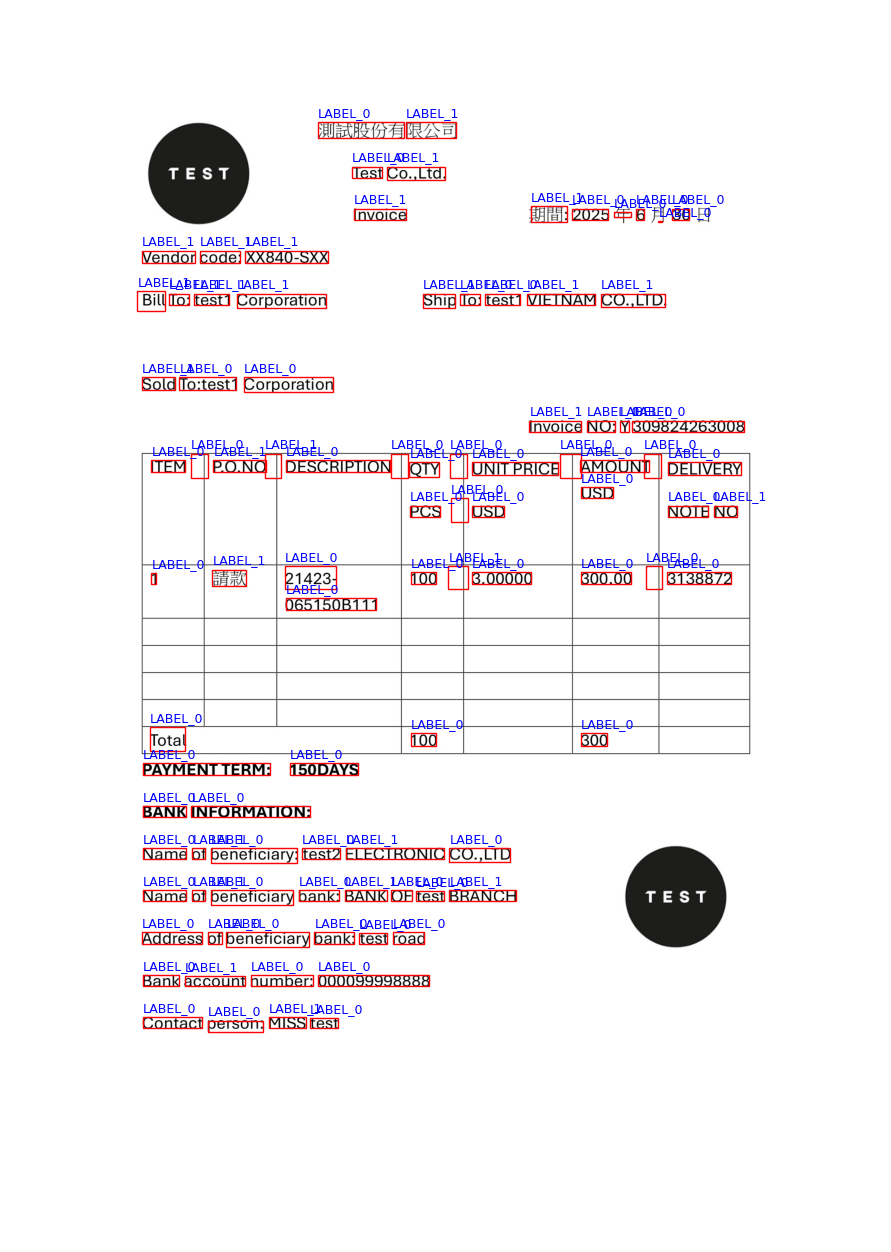

In [10]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

fig, ax = plt.subplots(1, figsize=(12, 16))
ax.imshow(image)

for result in results:
    box = result["bbox"]
    label = result["label"]
    rect = patches.Rectangle((box[0]*image.width/1000, box[1]*image.height/1000),
                             (box[2]-box[0])*image.width/1000,
                             (box[3]-box[1])*image.height/1000,
                             linewidth=1, edgecolor='red', facecolor='none')
    ax.add_patch(rect)
    ax.text(box[0]*image.width/1000, box[1]*image.height/1000 - 10, label, fontsize=9, color='blue')

plt.axis("off")
plt.show()

In [46]:
import json

# Create a list of 'O' labels as placeholders since the model was not fine-tuned for this task
# The length of labels list should match the length of words list.
labels = ["O"] * len(words)

# Assign placeholder labels for InvoiceDate, InvoiceNo, Currency, AmountWithoutTax, and AmountWithTax
# Find the index of the word "2025" for InvoiceDate
try:
    invoice_date_start_index = words.index("2025")
    labels[invoice_date_start_index] = "B-InvoiceDate"
    for i in range(invoice_date_start_index + 1, invoice_date_start_index + 5):
        if i < len(labels):
            labels[i] = "I-InvoiceDate"
except ValueError:
    pass # word not found

# Find the index of the word "Y" for InvoiceNo
try:
    invoice_no_start_index = words.index("Y")
    labels[invoice_no_start_index] = "B-InvoiceNo"
    if invoice_no_start_index + 1 < len(labels):
        labels[invoice_no_start_index + 1] = "I-InvoiceNo"
except ValueError:
    pass # word not found

# Find the index of the word "USD" for Currency
try:
    currency_start_index = words.index("USD")
    labels[currency_start_index] = "B-Currency"
    if currency_start_index + 3 < len(labels): # Assuming USD is followed by Pcs and |
        labels[currency_start_index + 3] = "I-Currency"
except ValueError:
    pass # word not found

# Find the indices for AmountWithoutTax and AmountWithTax (assuming they are "300" and "300" as seen in previous output)
try:
    amount_indices = [i for i, word in enumerate(words) if word == "300"]
    if len(amount_indices) >= 2:
        labels[amount_indices[-2]] = "B-AmountWithoutTax"
        labels[amount_indices[-1]] = "B-AmountWithTax"
except ValueError:
    pass # word not found


# Create the data structure
invoice_data = {
    "id": "invoice_sample_001",
    "words": words,
    "bboxes": boxes,
    "labels": labels,
    "image_path": "invoice_page_1.jpeg" # Replace with your actual image path if needed
}

# Save the data to a JSON file
# output_json_path = "/content/drive/MyDrive/AI_Lecture/dataset/invoice_sample_001.json" # Replace with your desired path
# with open(output_json_path, "w", encoding="utf-8") as f:
#     json.dump(invoice_data, f, indent=2, ensure_ascii=False)

# print(f"JSON file saved to: {output_json_path}")

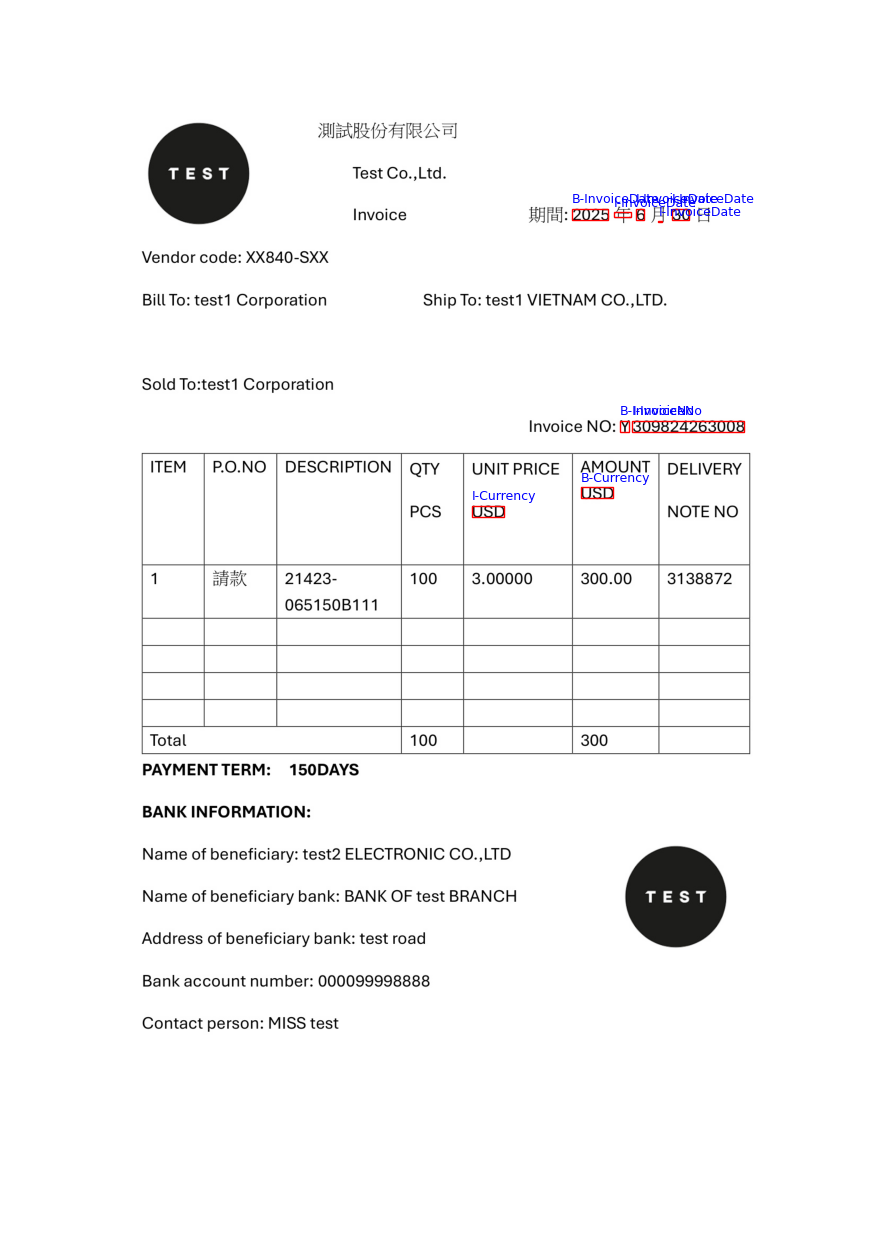

In [47]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image again as it might have been modified or the runtime reset
image_path = '/content/drive/MyDrive/AI_Lecture/dataset/images/invoice1.jpg'
image = Image.open(image_path).convert("RGB")

fig, ax = plt.subplots(1, figsize=(12, 16))
ax.imshow(image)

# Use the data from invoice_data
for word, box, label in zip(invoice_data["words"], invoice_data["bboxes"], invoice_data["labels"]):
    if label != "O": # Only visualize non-O labels
        # The boxes are already normalized to 0-1000, so we need to scale them back
        rect = patches.Rectangle((box[0]*image.width/1000, box[1]*image.height/1000),
                                 (box[2]-box[0])*image.width/1000,
                                 (box[3]-box[1])*image.height/1000,
                                 linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0]*image.width/1000, box[1]*image.height/1000 - 10, label, fontsize=9, color='blue')

plt.axis("off")
plt.show()

In [48]:
# Print B-I Label
idxs = []
for i in range(len(invoice_data['labels'])):
  if invoice_data['labels'][i] != 'O':
    idxs.append(i)

for i in idxs:
  print(invoice_data['labels'][i], " : ", invoice_data['words'][i])

B-InvoiceDate  :  2025
I-InvoiceDate  :  F
I-InvoiceDate  :  6
I-InvoiceDate  :  4
I-InvoiceDate  :  30
B-InvoiceNo  :  Y
I-InvoiceNo  :  309824263008
B-Currency  :  USD
I-Currency  :  USD


In [49]:
for i in idxs:
  if invoice_data['words'][i] == '2025':
    invoice_data['labels'][i] = 'B-InvoiceDate_Year'

  if invoice_data['words'][i] == '6':
    invoice_data['labels'][i] = 'B-InvoiceDate_Month'

  if invoice_data['words'][i] == '30':
    invoice_data['labels'][i] = 'B-InvoiceDate_Day'

  if invoice_data['words'][i] == 'F':
    invoice_data['labels'][i] = 'O'

  if invoice_data['words'][i] == '4':
    invoice_data['labels'][i] = 'O'

  if invoice_data['labels'][i] == 'I-Currency':
    invoice_data['labels'][i] = 'O'


In [50]:
# Print B-I Label
idxs = []
for i in range(len(invoice_data['labels'])):
  if invoice_data['labels'][i] != 'O':
    idxs.append(i)

for i in idxs:
  print(invoice_data['labels'][i], " : ", invoice_data['words'][i])

B-InvoiceDate_Year  :  2025
B-InvoiceDate_Month  :  6
B-InvoiceDate_Day  :  30
B-InvoiceNo  :  Y
I-InvoiceNo  :  309824263008
B-Currency  :  USD


In [52]:
invoice_data['words'].index('300')

61

In [53]:
invoice_data['labels'][61] = 'B-TotalAmount'

In [54]:
# Print B-I Label
idxs = []
for i in range(len(invoice_data['labels'])):
  if invoice_data['labels'][i] != 'O':
    idxs.append(i)

for i in idxs:
  print(invoice_data['labels'][i], " : ", invoice_data['words'][i])

B-InvoiceDate_Year  :  2025
B-InvoiceDate_Month  :  6
B-InvoiceDate_Day  :  30
B-InvoiceNo  :  Y
I-InvoiceNo  :  309824263008
B-Currency  :  USD
B-TotalAmount  :  300


### 目标数据

```
{
  "InvoiceNo": "Y 309824263008",
  "InvoiceDate": "2025年6月30日",
  "Currency": "USD",
  "Amount with Tax": "300",
  "Amount without Tax": "300",
  "Tax": "0"
}
```



In [56]:
invoice_data

{'id': 'invoice_sample_001',
 'words': ['WA',
  'PRA]',
  'Test',
  'Co.,Ltd.',
  'Invoice',
  'Vendor',
  'code:',
  'XX840-SXX',
  'Bill',
  'To:',
  'test1',
  'Corporation',
  'Sold',
  'To:test1',
  'Corporation',
  'Ship',
  'To:',
  'test1',
  'VIETNAM',
  'CO.,LTD.',
  'HAfa]:',
  '2025',
  'F',
  '6',
  '4',
  '30',
  'Invoice',
  'NO:',
  'Y',
  '309824263008',
  'ITEM',
  '|',
  'P.O.NO',
  '|',
  'DESCRIPTION',
  '|',
  'QTY',
  '|',
  'UNITPRICE',
  '|',
  'AMOUNT',
  '|',
  'DELIVERY',
  'USD',
  'Pcs',
  '|',
  'USD',
  'NOTE',
  'NO',
  '1',
  'aK',
  '21423-',
  '100',
  '|',
  '3.00000',
  '300.00',
  '|',
  '3138872',
  '065150B111',
  'Total',
  '100',
  '300',
  'PAYMENTTERM:',
  '150DAYS',
  'BANK',
  'INFORMATION:',
  'Name',
  'of',
  'beneficiary:',
  'test2',
  'ELECTRONIC',
  'CO.,LTD',
  'Name',
  'of',
  'beneficiary',
  'bank:',
  'BANK',
  'OF',
  'test',
  'BRANCH',
  'Address',
  'of',
  'beneficiary',
  'bank:',
  'test',
  'road',
  'Bank',
  'account

In [57]:
invoice_data['hasTax'] = 'No-Tax'
invoice_data['format'] = 'format_1'

In [58]:
invoice_data

{'id': 'invoice_sample_001',
 'words': ['WA',
  'PRA]',
  'Test',
  'Co.,Ltd.',
  'Invoice',
  'Vendor',
  'code:',
  'XX840-SXX',
  'Bill',
  'To:',
  'test1',
  'Corporation',
  'Sold',
  'To:test1',
  'Corporation',
  'Ship',
  'To:',
  'test1',
  'VIETNAM',
  'CO.,LTD.',
  'HAfa]:',
  '2025',
  'F',
  '6',
  '4',
  '30',
  'Invoice',
  'NO:',
  'Y',
  '309824263008',
  'ITEM',
  '|',
  'P.O.NO',
  '|',
  'DESCRIPTION',
  '|',
  'QTY',
  '|',
  'UNITPRICE',
  '|',
  'AMOUNT',
  '|',
  'DELIVERY',
  'USD',
  'Pcs',
  '|',
  'USD',
  'NOTE',
  'NO',
  '1',
  'aK',
  '21423-',
  '100',
  '|',
  '3.00000',
  '300.00',
  '|',
  '3138872',
  '065150B111',
  'Total',
  '100',
  '300',
  'PAYMENTTERM:',
  '150DAYS',
  'BANK',
  'INFORMATION:',
  'Name',
  'of',
  'beneficiary:',
  'test2',
  'ELECTRONIC',
  'CO.,LTD',
  'Name',
  'of',
  'beneficiary',
  'bank:',
  'BANK',
  'OF',
  'test',
  'BRANCH',
  'Address',
  'of',
  'beneficiary',
  'bank:',
  'test',
  'road',
  'Bank',
  'account

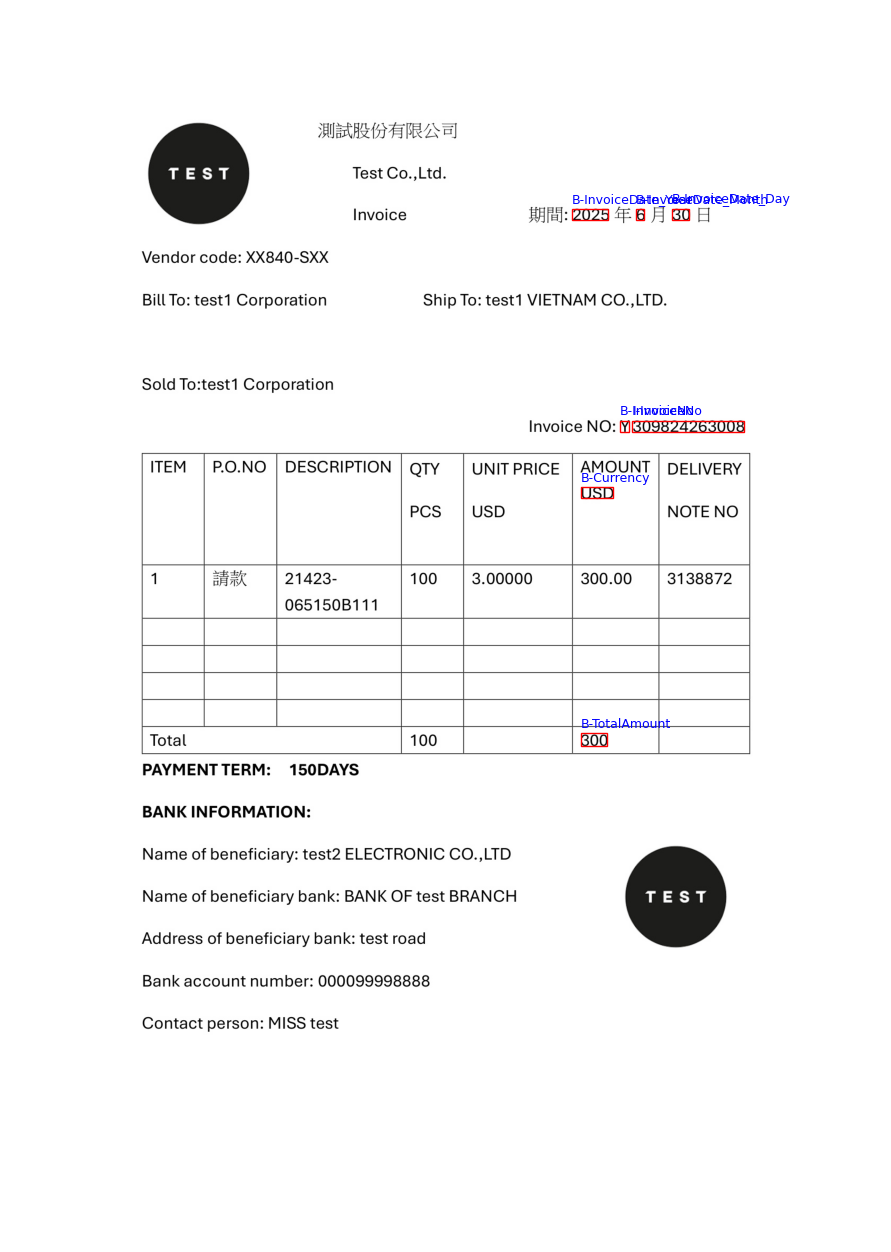

In [59]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

# Load the image again as it might have been modified or the runtime reset
image_path = '/content/drive/MyDrive/AI_Lecture/dataset/images/invoice1.jpg'
image = Image.open(image_path).convert("RGB")

fig, ax = plt.subplots(1, figsize=(12, 16))
ax.imshow(image)

# Use the data from invoice_data
for word, box, label in zip(invoice_data["words"], invoice_data["bboxes"], invoice_data["labels"]):
    if label != "O": # Only visualize non-O labels
        # The boxes are already normalized to 0-1000, so we need to scale them back
        rect = patches.Rectangle((box[0]*image.width/1000, box[1]*image.height/1000),
                                 (box[2]-box[0])*image.width/1000,
                                 (box[3]-box[1])*image.height/1000,
                                 linewidth=1, edgecolor='red', facecolor='none')
        ax.add_patch(rect)
        ax.text(box[0]*image.width/1000, box[1]*image.height/1000 - 10, label, fontsize=9, color='blue')

plt.axis("off")
plt.show()

### 找规律/Find Pattern

In [62]:
print("col_ITEM:", words.index("ITEM"), " 1st_row_ITEM:", words.index("1"))

col_ITEM: 30  1st_row_ITEM: 49


In [64]:
print("col_DESCRIPTION:", words.index("DESCRIPTION"), " 1st_row_DESCRIPTION:", words.index("21423-"))

col_DESCRIPTION: 34  1st_row_DESCRIPTION: 51


In [63]:
print("col_AMOUNT:", words.index("AMOUNT"), " 1st_row_AMOUNT:", words.index("300.00"))

col_AMOUNT: 40  1st_row_AMOUNT: 55


In [65]:
print("col_UNITPRICE:", words.index("UNITPRICE"), " 1st_row_UNITPRICE:", words.index("3.00000"))

col_UNITPRICE: 38  1st_row_UNITPRICE: 54


In [66]:
print("col_QTY:", words.index("QTY"), " 1st_row_QTY:", words.index("100"))

col_QTY: 36  1st_row_QTY: 52


In [67]:
words.index("3.00000") - words.index("UNITPRICE")

16

In [68]:
words.index("300.00") - words.index("AMOUNT")

15

In [33]:
words.index("100") - words.index("QTY")

16

In [69]:
words.index("1") - words.index("ITEM")

19

In [70]:
words.index("21423-") - words.index("DESCRIPTION")

17

#### 一行文字的 bbox 一般是一个 4 元组：

bbox = [x0, y0, x1, y1]

分别表示：

名称	含义
x0	左上角横坐标（最小 x）
y0	左上角纵坐标（最小 y）
x1	右下角横坐标（最大 x）
y1	右下角纵坐标（最大 y）


#### 坐标单位：

	•	一般 标准化到 [0, 1000] 范围内，即使原始图像是 1000×1500 或其他分辨率。
	•	x 越大 → 位置越右；y 越大 → 位置越下。

#### 示例：

假设发票中某个字段 "300" 的文字区域在图像上的位置为：

bbox = [100, 300, 200, 350]

说明这个字段出现在：

	•	左上角位置是 (100, 300)
	•	右下角位置是 (200, 350)

即它宽度为 100，高度为 50 的矩形区域。


#### 在 LayoutLM 中的作用：

	•	bbox 信息帮助模型理解文本在图像上的空间布局（例如谁在谁上面、谁在谁右边）。
	•	这是 LayoutLM 比传统 NLP 更擅长处理“表格”“发票”等布局类文档的关键优势。


In [79]:
for i in range(len(invoice_data['bboxes'][words.index("3.00000")])):
  print(i, " : ", invoice_data['bboxes'][words.index("3.00000")][i] - invoice_data['bboxes'][words.index("AMOUNT")][i])

0  :  0
1  :  89
2  :  -31
3  :  89


In [81]:
for i in range(len(invoice_data['bboxes'][words.index("300.00")])):
  print(i, " : ", invoice_data['bboxes'][words.index("300.00")][i] - invoice_data['bboxes'][words.index("UNITPRICE")][i])

0  :  125
1  :  89
2  :  83
3  :  89


In [84]:
for i in range(len(invoice_data['bboxes'][words.index("100")])):
  print(i, " : ", invoice_data['bboxes'][words.index("100")][i] - invoice_data['bboxes'][words.index("QTY")][i])

0  :  2
1  :  89
2  :  -3
3  :  87


In [85]:
for i in range(len(invoice_data['bboxes'][words.index("21423-")])):
  print(i, " : ", invoice_data['bboxes'][words.index("21423-")][i] - invoice_data['bboxes'][words.index("DESCRIPTION")][i])

0  :  -1
1  :  86
2  :  -62
3  :  95


In [86]:
# Print B-I Label
idxs = []
for i in range(len(invoice_data['labels'])):
  if invoice_data['labels'][i].startswith('B') or invoice_data['labels'][i].startswith('I'):
    idxs.append(i)

for i in idxs:
  print(invoice_data['labels'][i], " : ", invoice_data['words'][i])

B-InvoiceDate_Year  :  2025
B-InvoiceDate_Month  :  6
B-InvoiceDate_Day  :  30
B-InvoiceNo  :  Y
I-InvoiceNo  :  309824263008
B-Currency  :  USD
B-TotalAmount  :  300


In [87]:
import json

output_json_path = "/content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice1.json"
with open(output_json_path, "w", encoding="utf-8") as f:
    json.dump(invoice_data, f, indent=2, ensure_ascii=False)

print(f"JSON file saved to: {output_json_path}")

JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice1.json


In [88]:
for i in range(2, 11):
  output_json_path = f"/content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice{i}.json"
  with open(output_json_path, "w", encoding="utf-8") as f:
      json.dump(invoice_data, f, indent=2, ensure_ascii=False)

  print(f"JSON file saved to: {output_json_path}")

JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice2.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice3.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice4.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice5.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice6.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice7.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice8.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice9.json
JSON file saved to: /content/drive/MyDrive/AI_Lecture/dataset/annotations/invoice10.json


### 灵活贴标签



```
B-ItemID
I-ItemID

B-QTY
I-QTY

B-UnitPice
I-UnitPice

B-Total
I-Total
```

> Total amount = count(B-ItemID, I-ItemID) * [ (B-QTY, I-QTY) *  (B-UnitPice, I-UnitPice) ]






In [89]:
from transformers import LayoutLMv3Processor
from PIL import Image

image = Image.open("/content/drive/MyDrive/AI_Lecture/dataset/images/invoice1.jpg")
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base")

# OCR + 分词 + bbox
encoding = processor(image, return_tensors="pt")

In [ ]:
encoding

### 构建 HuggingFace Dataset 格式

要构建成 HuggingFace datasets.Dataset 格式以用于模型微调（例如微调 LayoutLMv3 或类似模型），你需要将你的数据组织为一个包含多个样本的结构，每个样本是一个字典，包含以下字段：



```
{
    "input_ids": List[int],
    "attention_mask": List[int],
    "bbox": List[List[int]],   # 每个 token 一个 bbox，共 N 个 bbox，形状是 (N, 4)
    "labels": List[int],       # BIO 标签的整数编码（跟 input_ids 对齐）
    "image": PIL.Image         # 可选：原图像，如果你需要重新 encode
}
```



In [96]:
from transformers import LayoutLMv3Processor
from datasets import Dataset, DatasetDict
import torch
import json
import os
from PIL import Image

# 加载 tokenizer + feature extractor
processor = LayoutLMv3Processor.from_pretrained("microsoft/layoutlmv3-base", apply_ocr=False)

# B-InvoiceDate_Year  :  2025
# B-InvoiceDate_Month  :  6
# B-InvoiceDate_Day  :  30
# B-InvoiceNo  :  Y
# I-InvoiceNo  :  309824263008
# B-Currency  :  USD
# B-TotalAmount  :  300

# 定义标签映射（你可以自定义）
label2id = {
    "O": 0,
    "B-InvoiceNo": 1,
    "I-InvoiceNo": 2,
    "B-InvoiceDate_Year": 3,
    "B-InvoiceDate_Month": 4,
    "B-InvoiceDate_Day": 5,
    "B-Currency": 6,  # Changed I-Currency to B-Currency based on previous output
    "B-TotalAmount": 7
}
id2label = {v: k for k, v in label2id.items()}

# 假设你有一个 JSON list，每个元素结构如下：
# {
#     "image_path": "invoice_01.jpg",
#     "words": ["300", "USD", ...],
#     "bboxes": [[x0, y0, x1, y1], ...],
#     "labels": ["B-AmountWithTax", "B-Currency", ...]
# }

def encode_sample(sample):
    # 加载图片
    image = Image.open(sample["image_path"]).convert("RGB")

    # Pass words and boxes as lists to the processor
    encoding = processor(images=[image], text=[sample["words"]], boxes=[sample["bboxes"]], return_tensors="pt", truncation=True, padding="max_length", max_length=512)

    # 将文字 label 映射为 id
    encoded_labels = [label2id.get(label, 0) for label in sample["labels"]]
    # Pad labels to match the tokenized input length
    # The processor might add special tokens, so we need to align labels with input_ids
    # A simple padding might not be enough for accurate labeling,
    # but for demonstration, we'll pad to max_length
    padded_labels = encoded_labels + [0] * (512 - len(encoded_labels))
    padded_labels = padded_labels[:512]


    return {
        "input_ids": encoding["input_ids"][0],
        "attention_mask": encoding["attention_mask"][0],
        "bbox": encoding["bbox"][0],
        "labels": torch.tensor(padded_labels),
        "image": image # Keep the original image for potential later use with image processor
    }

# 加载所有 JSON 标签数据
def load_json_data(json_dir):
    data = []
    for filename in os.listdir(json_dir):
        if filename.endswith(".json"):
            # Construct the full image path assuming images are in a sibling directory
            json_path = os.path.join(json_dir, filename)
            with open(json_path, "r", encoding="utf-8") as f:
                sample_data = json.load(f)
                # Assuming image files have the same name as json but with .jpg extension
                image_filename = filename.replace(".json", ".jpg")
                # Corrected image_path to point to the 'images' directory
                image_path = os.path.join(os.path.dirname(os.path.dirname(json_dir)), "images", image_filename)
                sample_data["image_path"] = image_path
                data.append(sample_data)
    return data

# 路径替换成你自己的
json_dir = "/content/drive/MyDrive/AI_Lecture/dataset/annotations/"
raw_data = load_json_data(json_dir)

# 编码所有样本
encoded_samples = [encode_sample(sample) for sample in raw_data]

# 转为 HuggingFace Dataset
# Collect the encoded data into lists
input_ids_list = [s["input_ids"].tolist() for s in encoded_samples]
attention_mask_list = [s["attention_mask"].tolist() for s in encoded_samples]
bbox_list = [s["bbox"].tolist() for s in encoded_samples]
labels_list = [s["labels"].tolist() for s in encoded_samples]
image_list = [s["image"] for s in encoded_samples]


dataset = Dataset.from_dict({
    "input_ids": input_ids_list,
    "attention_mask": attention_mask_list,
    "bbox": bbox_list,
    "labels": labels_list,
    "image": image_list,  # 用于 image processor
})


# （可选）划分训练/验证集
dataset_dict = dataset.train_test_split(test_size=0.1)

# Print the structure and some info
print(dataset_dict)
print("\nSample features of the first item in the training set:")
print(dataset_dict["train"][0].keys())
print("\nLength of input_ids in the first training sample:", len(dataset_dict["train"][0]["input_ids"]))
print("\nLength of labels in the first training sample:", len(dataset_dict["train"][0]["labels"]))

DatasetDict({
    train: Dataset({
        features: ['input_ids', 'attention_mask', 'bbox', 'labels', 'image'],
        num_rows: 9
    })
    test: Dataset({
        features: ['input_ids', 'attention_mask', 'bbox', 'labels', 'image'],
        num_rows: 1
    })
})

Sample features of the first item in the training set:
dict_keys(['input_ids', 'attention_mask', 'bbox', 'labels', 'image'])

Length of input_ids in the first training sample: 512

Length of labels in the first training sample: 512


### 模型训练

In [102]:
from transformers import LayoutLMv3ForTokenClassification, TrainingArguments, Trainer

model = LayoutLMv3ForTokenClassification.from_pretrained(
    "microsoft/layoutlmv3-base", num_labels=len(label2id), id2label=id2label, label2id=label2id
)

# 定义训练参数
training_args = TrainingArguments(
    output_dir="./layoutlmv3-invoice-model",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=10,
    logging_dir="./logs",
    report_to="none",  # 👈 加上这个禁用 wandb
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["test"],
    tokenizer=processor,
    # compute_metrics=compute_metrics
)

trainer.train()

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-963029881.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch,Training Loss,Validation Loss
1,No log,0.123728
2,No log,0.094133
3,No log,0.084335
4,No log,0.075111
5,No log,0.065373
6,No log,0.056043
7,No log,0.049813
8,No log,0.046090
9,No log,0.045151
10,No log,0.042627


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modelin

TrainOutput(global_step=50, training_loss=0.15294236183166504, metrics={'train_runtime': 660.8787, 'train_samples_per_second': 0.136, 'train_steps_per_second': 0.076, 'total_flos': 23724693504000.0, 'train_loss': 0.15294236183166504, 'epoch': 10.0})

In [107]:
from sklearn.metrics import precision_recall_fscore_support, accuracy_score

def compute_metrics(p):
    predictions, labels = p
    predictions = predictions.argmax(-1)

    # 去除 padding 部分
    true_predictions = [
        [id2label[p] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]
    true_labels = [
        [id2label[l] for (p, l) in zip(prediction, label) if l != -100]
        for prediction, label in zip(predictions, labels)
    ]

    precision, recall, f1, _ = precision_recall_fscore_support(
        sum(true_labels, []),
        sum(true_predictions, []),
        average="micro"
    )

    acc = accuracy_score(sum(true_labels, []), sum(true_predictions, []))

    return {
        "accuracy": acc,
        "f1": f1,
        "precision": precision,
        "recall": recall,
    }

In [108]:
from transformers import LayoutLMv3ForTokenClassification, TrainingArguments, Trainer

model = LayoutLMv3ForTokenClassification.from_pretrained(
    "microsoft/layoutlmv3-base", num_labels=len(label2id), id2label=id2label, label2id=label2id
)

# 定义训练参数
training_args = TrainingArguments(
    output_dir="./layoutlmv3-invoice-model",
    per_device_train_batch_size=2,
    per_device_eval_batch_size=2,
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    num_train_epochs=10,
    logging_dir="./logs",
    report_to="none",  # 👈 加上这个禁用 wandb
)

trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=dataset_dict["train"],
    eval_dataset=dataset_dict["test"],
    tokenizer=processor,
    compute_metrics=compute_metrics
)

trainer.train()

Some weights of LayoutLMv3ForTokenClassification were not initialized from the model checkpoint at microsoft/layoutlmv3-base and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipython-input-486587536.py:20: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


Epoch,Training Loss,Validation Loss,Accuracy,F1,Precision,Recall
1,No log,0.123459,0.986328,0.986328,0.986328,0.986328
2,No log,0.093669,0.986328,0.986328,0.986328,0.986328
3,No log,0.085028,0.986328,0.986328,0.986328,0.986328
4,No log,0.073371,0.986328,0.986328,0.986328,0.986328
5,No log,0.063376,0.986328,0.986328,0.986328,0.986328
6,No log,0.055915,0.986328,0.986328,0.986328,0.986328
7,No log,0.049290,0.986328,0.986328,0.986328,0.986328
8,No log,0.045013,0.986328,0.986328,0.986328,0.986328
9,No log,0.041686,0.986328,0.986328,0.986328,0.986328
10,No log,0.040537,0.986328,0.986328,0.986328,0.986328


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/transformers/modelin

TrainOutput(global_step=50, training_loss=0.1661232566833496, metrics={'train_runtime': 353.4971, 'train_samples_per_second': 0.255, 'train_steps_per_second': 0.141, 'total_flos': 23724693504000.0, 'train_loss': 0.1661232566833496, 'epoch': 10.0})

In [109]:
trainer.evaluate()

/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


{'eval_loss': 0.040536634624004364,
 'eval_accuracy': 0.986328125,
 'eval_f1': 0.986328125,
 'eval_precision': 0.986328125,
 'eval_recall': 0.986328125,
 'eval_runtime': 0.0753,
 'eval_samples_per_second': 13.284,
 'eval_steps_per_second': 13.284,
 'epoch': 10.0}

### 保存模型和处理器（processor）

In [110]:
model.save_pretrained("./layoutlmv3-invoice-model")
processor.save_pretrained("./layoutlmv3-invoice-model")

[]

## 推理代码（Inference Demo）

In [113]:
from transformers import LayoutLMv3Processor, LayoutLMv3ForTokenClassification
from PIL import Image
import torch
import pytesseract

# 加载模型和processor
processor = LayoutLMv3Processor.from_pretrained("./layoutlmv3-invoice-model")
model = LayoutLMv3ForTokenClassification.from_pretrained("./layoutlmv3-invoice-model")

# 设置标签映射
id2label = model.config.id2label

# 加载测试图片
image_path_inference = "/content/drive/MyDrive/AI_Lecture/dataset/images/invoice1.jpg" # Replace with the path to your inference image
image = Image.open(image_path_inference).convert("RGB")

# Perform OCR to get words and boxes
ocr_data = pytesseract.image_to_data(image, output_type=pytesseract.Output.DICT)
words = []
boxes = []
width, height = image.size

for i in range(len(ocr_data["text"])):
    if ocr_data["text"][i].strip() != "":
        words.append(ocr_data["text"][i])
        x, y, w, h = ocr_data["left"][i], ocr_data["top"][i], ocr_data["width"][i], ocr_data["height"][i]
        # normalize to 0-1000 as required by LayoutLM
        boxes.append([
            int(1000 * x / width),
            int(1000 * y / height),
            int(1000 * (x + w) / width),
            int(1000 * (y + h) / height)
        ])

# Preprocess the image and extracted words/boxes
encoding = processor(images=[image], text=[words], boxes=[boxes], return_tensors="pt")

# Move tensors to the same device as the model
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
encoding = {k: v.to(device) for k, v in encoding.items()}
model.to(device)


# Inference
with torch.no_grad():
    outputs = model(**encoding)
    logits = outputs.logits
    predicted_ids = torch.argmax(logits, dim=-1).squeeze().tolist()

# Decode token and label
tokens = processor.tokenizer.convert_ids_to_tokens(encoding["input_ids"].squeeze())
labels = [id2label[i] for i in predicted_ids]

# Extract fields
extracted = {}
current_label = None
current_value = ""

for token, label in zip(tokens, labels):
    if label.startswith("B-"):
        if current_label and current_value:
            extracted[current_label] = current_value.strip()
        current_label = label[2:]
        current_value = token
    elif label.startswith("I-") and current_label:
        current_value += token.replace(" ", " ")  # 对 LayoutLMv3 tokenizer 的空格处理
    else:
        if current_label and current_value:
            extracted[current_label] = current_value.strip()
        current_label = None
        current_value = ""

# Last field
if current_label and current_value:
    extracted[current_label] = current_value.strip()

print(extracted)

{}


/usr/local/lib/python3.11/dist-packages/transformers/modeling_utils.py:1735: FutureWarning: The `device` argument is deprecated and will be removed in v5 of Transformers.
  warnings.warn(


In [115]:
print(words[:50])

['WA', 'PRA]', 'Test', 'Co.,Ltd.', 'Invoice', 'Vendor', 'code:', 'XX840-SXX', 'Bill', 'To:', 'test1', 'Corporation', 'Sold', 'To:test1', 'Corporation', 'Ship', 'To:', 'test1', 'VIETNAM', 'CO.,LTD.', 'HAfa]:', '2025', 'F', '6', '4', '30', 'Invoice', 'NO:', 'Y', '309824263008', 'ITEM', '|', 'P.O.NO', '|', 'DESCRIPTION', '|', 'QTY', '|', 'UNITPRICE', '|', 'AMOUNT', '|', 'DELIVERY', 'USD', 'Pcs', '|', 'USD', 'NOTE', 'NO', '1']


In [116]:
for token, label in zip(tokens, labels):
    print(f"{token:15} -> {label}")

<s>             -> O
ĠWA             -> O
ĠP              -> O
RA              -> O
]               -> O
ĠTest           -> O
ĠCo             -> O
.,              -> O
L               -> O
td              -> O
.               -> O
ĠInv            -> O
oice            -> O
ĠVendor         -> O
Ġcode           -> O
:               -> O
ĠXX             -> O
840             -> O
-               -> O
S               -> O
XX              -> O
ĠBill           -> O
ĠTo             -> O
:               -> O
Ġtest           -> O
1               -> O
ĠCorporation    -> O
ĠSold           -> O
ĠTo             -> O
:               -> O
test            -> O
1               -> O
ĠCorporation    -> O
ĠShip           -> O
ĠTo             -> O
:               -> O
Ġtest           -> O
1               -> O
ĠVI             -> O
ET              -> O
N               -> O
AM              -> O
ĠCO             -> O
.,              -> O
L               -> O
TD              -> O
.               -> O
ĠHA          

In [119]:
print(encoding["input_ids"].shape[1] == logits.shape[1])

True


In [120]:
print(id2label)
# 应该是类似 {"0": "O", "1": "B-InvoiceNo", "2": "I-InvoiceNo", ...}

{0: 'O', 1: 'B-InvoiceNo', 2: 'I-InvoiceNo', 3: 'B-InvoiceDate_Year', 4: 'B-InvoiceDate_Month', 5: 'B-InvoiceDate_Day', 6: 'B-Currency', 7: 'B-TotalAmount'}
